<a href="https://colab.research.google.com/github/shreya444214/CODECLAUSE/blob/main/Personality_Prediction_system_Via_CV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreya0605","key":"514a4a2e6a9dabf0c98c328e4a9df881"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
! kaggle datasets download -d pavlorymarchuk/test3434

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier


In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
py.init_notebook_mode(connected = True)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [33]:
mydata = pd.read_csv('/train.csv')

In [12]:
mydata.head(10)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
5,Male,18,5,7,7,6,4,lively
6,Female,17,5,6,5,7,4,extraverted
7,Female,19,6,6,7,5,4,extraverted
8,Male,18,5,7,5,6,7,dependable
9,Female,19,5,5,7,4,5,lively


In [36]:
mydata.shape

(709, 8)

In [39]:
mydata.dtypes

Gender                       object
Age                           int64
openness                      int64
neuroticism                   int64
conscientiousness             int64
agreeableness                 int64
extraversion                  int64
Personality (Class label)    object
dtype: object

In [40]:
mydata.columns

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality (Class label)'],
      dtype='object')

In [41]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     709 non-null    object
 1   Age                        709 non-null    int64 
 2   openness                   709 non-null    int64 
 3   neuroticism                709 non-null    int64 
 4   conscientiousness          709 non-null    int64 
 5   agreeableness              709 non-null    int64 
 6   extraversion               709 non-null    int64 
 7   Personality (Class label)  709 non-null    object
dtypes: int64(6), object(2)
memory usage: 44.4+ KB


In [42]:
mydata.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [43]:
mydata.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [44]:
mydata.describe(include="all")

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
count,709,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,serious
freq,380,NaN,NaN,NaN,NaN,NaN,NaN,161
mean,NaN,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027,NaN
std,NaN,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404,NaN
min,NaN,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000,NaN
50%,NaN,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN
75%,NaN,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000,NaN


<Axes: xlabel='Personality (Class label)', ylabel='count'>

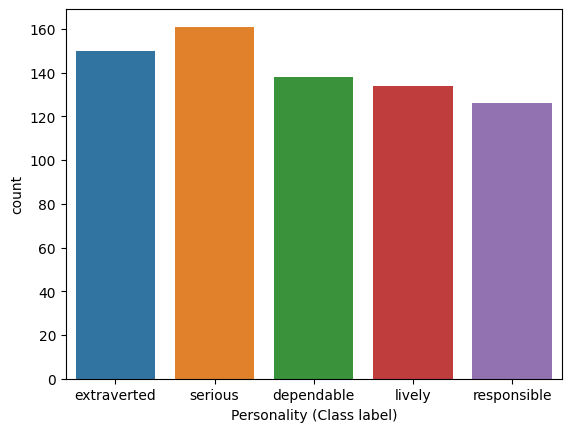

In [45]:
sns.countplot(x="Personality (Class label)",data=mydata)


<Axes: xlabel='Gender', ylabel='count'>

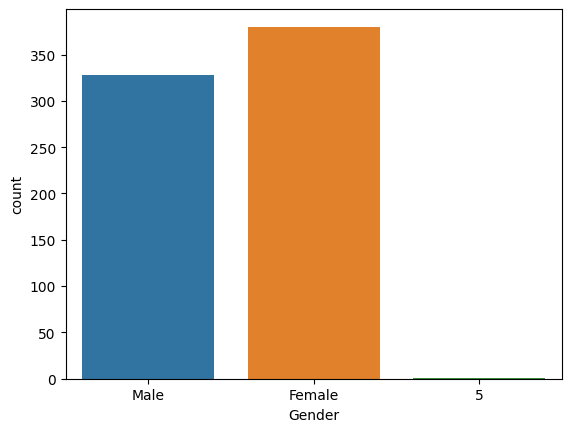

In [46]:
sns.countplot(x="Gender",data=mydata)

<Axes: xlabel='openness', ylabel='count'>

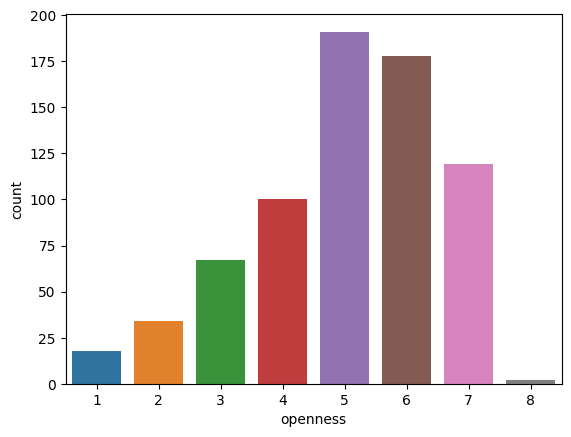

In [47]:
sns.countplot(x="openness",data=mydata)

<Axes: xlabel='Gender', ylabel='count'>

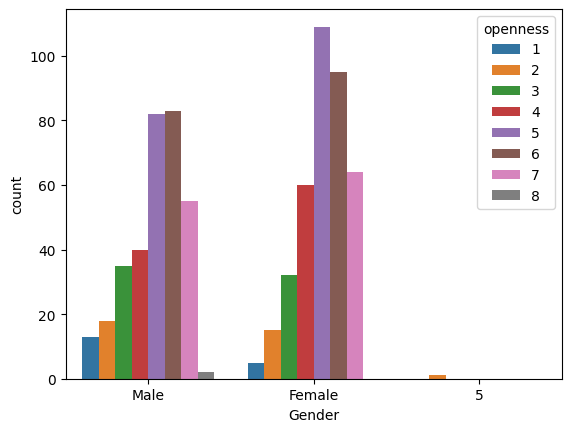

In [50]:
sns.countplot(x="Gender",hue="openness",data=mydata)

<Axes: xlabel='Gender', ylabel='count'>

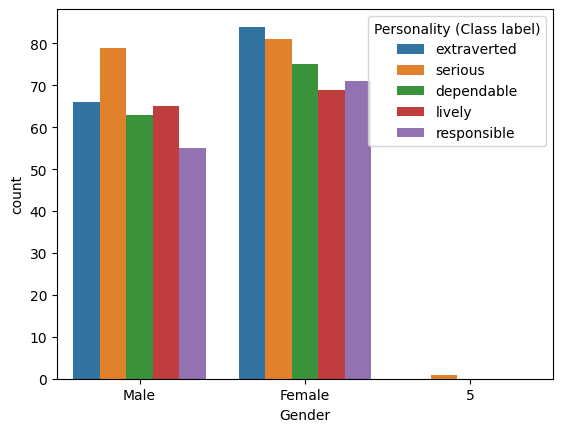

In [51]:
sns.countplot(x="Gender",hue="Personality (Class label)",data=mydata)

<Axes: xlabel='Gender', ylabel='count'>

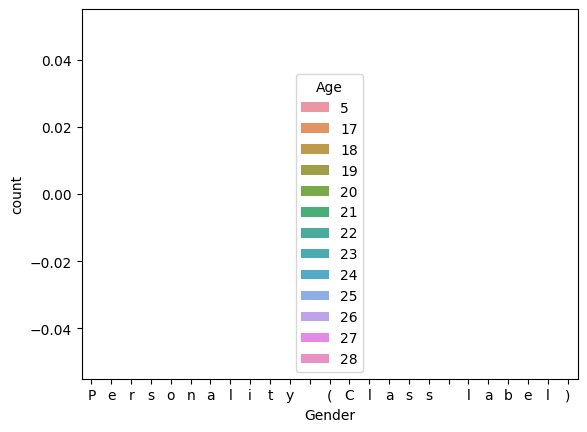

In [52]:
sns.countplot(x="Gender",hue="Age",order="Personality (Class label)",data=mydata)

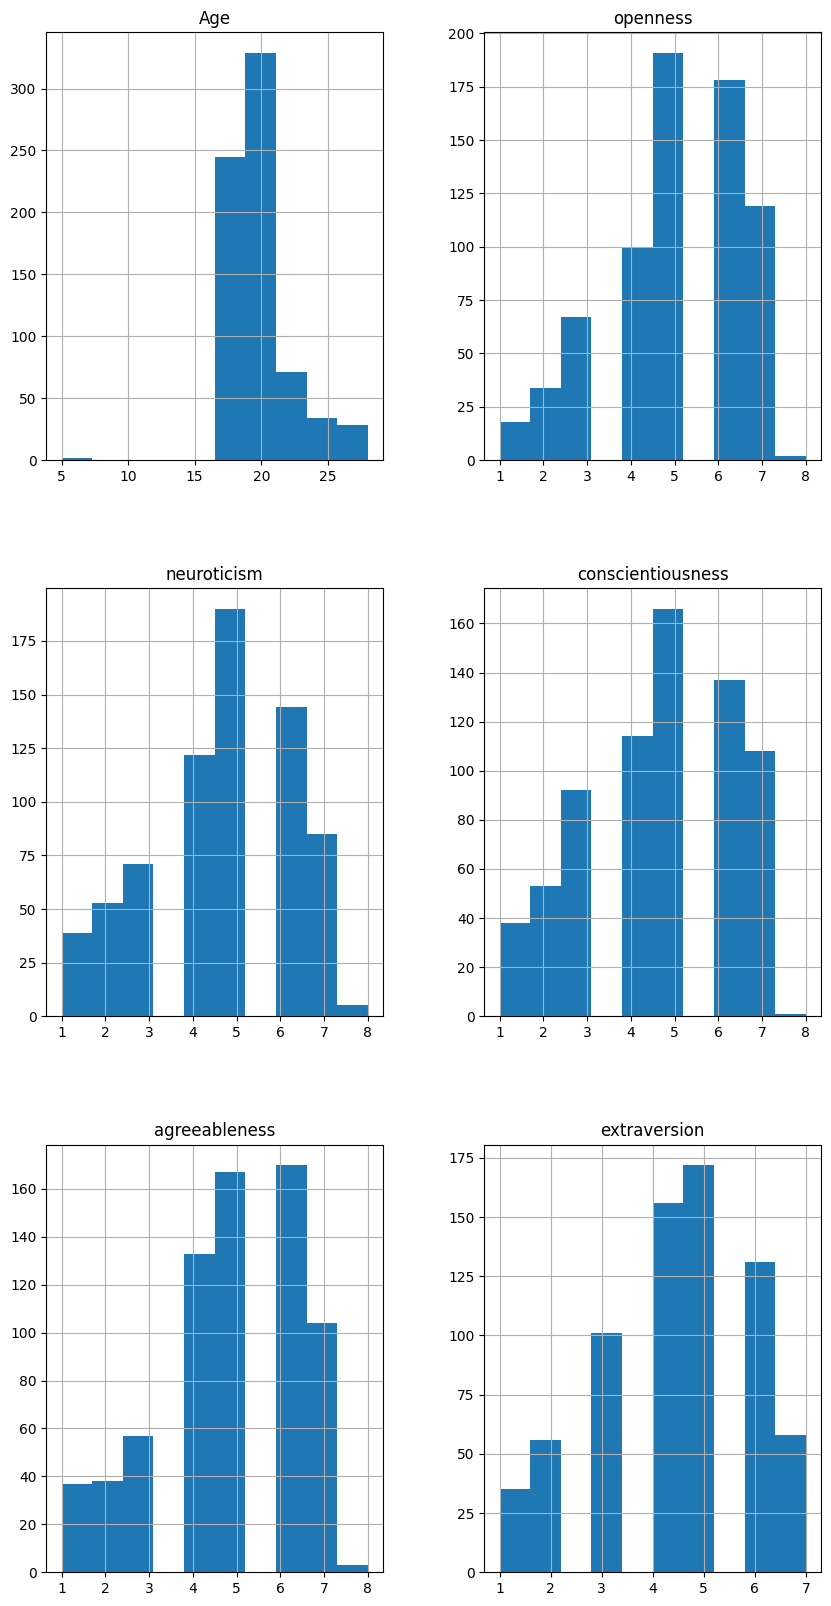

In [53]:
mydata.hist(figsize=(10,20))
plt.show()

<Axes: xlabel='Age'>

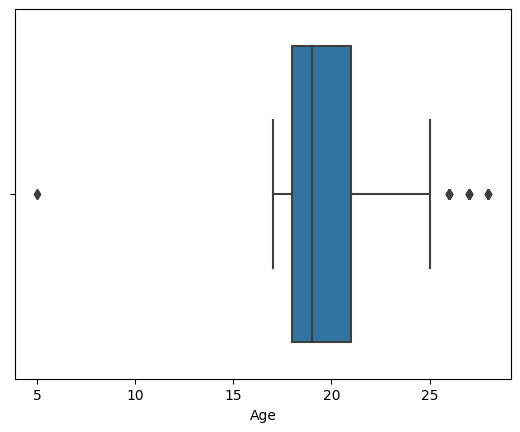

In [54]:
sns.boxplot(x="Age",data=mydata)

<Axes: xlabel='neuroticism', ylabel='conscientiousness'>

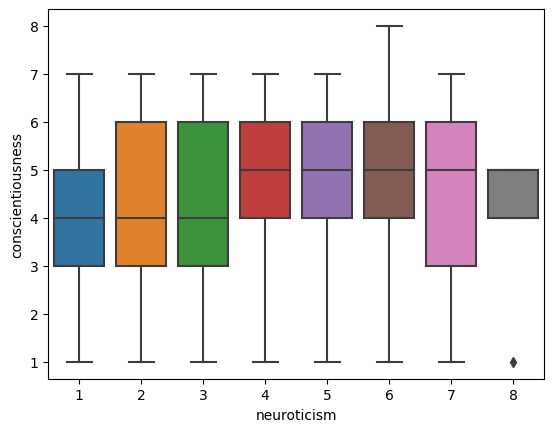

In [55]:
sns.boxplot(x="neuroticism",y="conscientiousness",data=mydata)

In [56]:
pd.crosstab(mydata['Personality (Class label)'],mydata['Gender'])

Gender,5,Female,Male
Personality (Class label),,,
dependable,0,75,63
extraverted,0,84,66
lively,0,69,65
responsible,0,71,55
serious,1,81,79


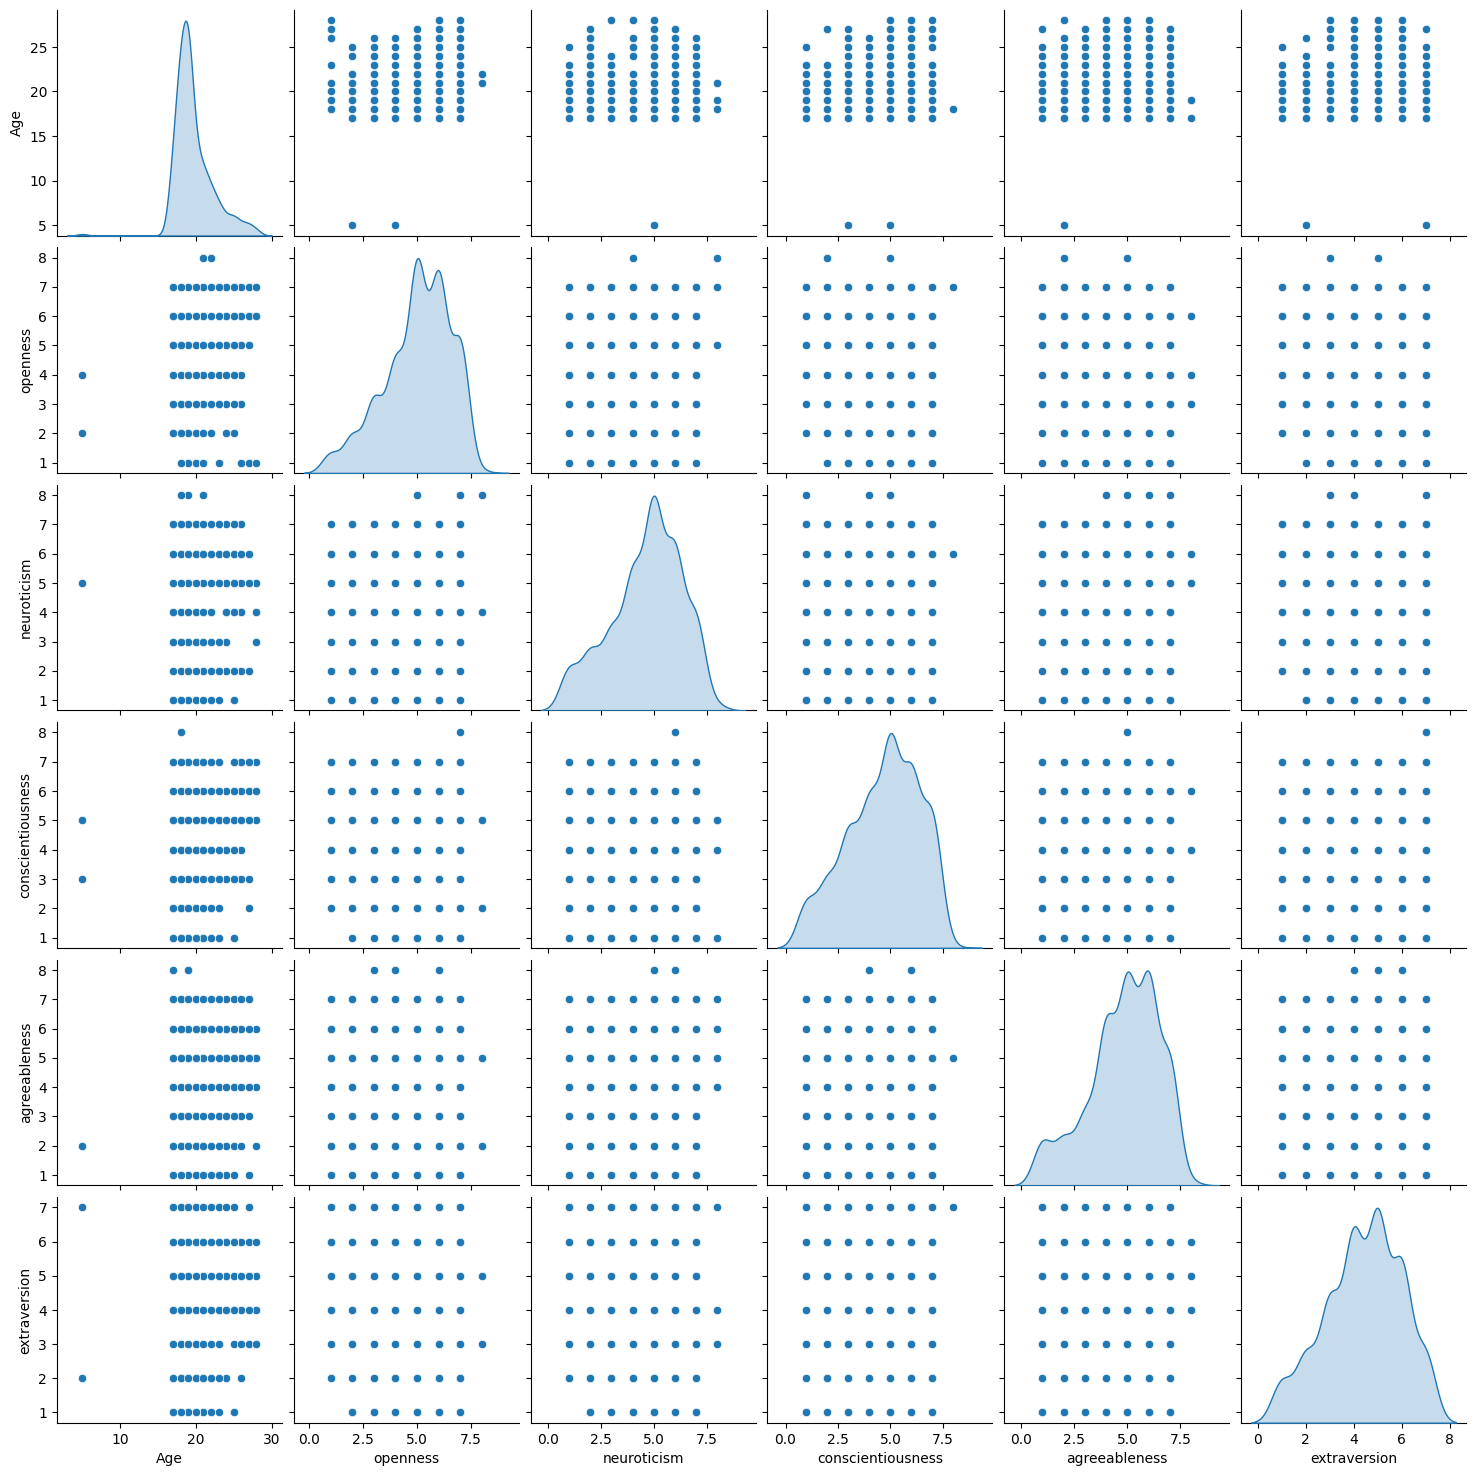

In [57]:
sns.pairplot(mydata,diag_kind="kde")
plt.show()

In [58]:
corr= mydata.corr()
corr

<ipython-input-58-970b52b15329>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,1.000000,0.026814,-0.031079,0.053638,0.004351,0.049248
openness,0.026814,1.000000,0.013979,0.011460,-0.008310,-0.042549
neuroticism,-0.031079,0.013979,1.000000,0.089869,-0.055299,-0.031371
conscientiousness,0.053638,0.011460,0.089869,1.000000,0.022582,0.029349
agreeableness,0.004351,-0.008310,-0.055299,0.022582,1.000000,-0.035933
extraversion,0.049248,-0.042549,-0.031371,0.029349,-0.035933,1.000000


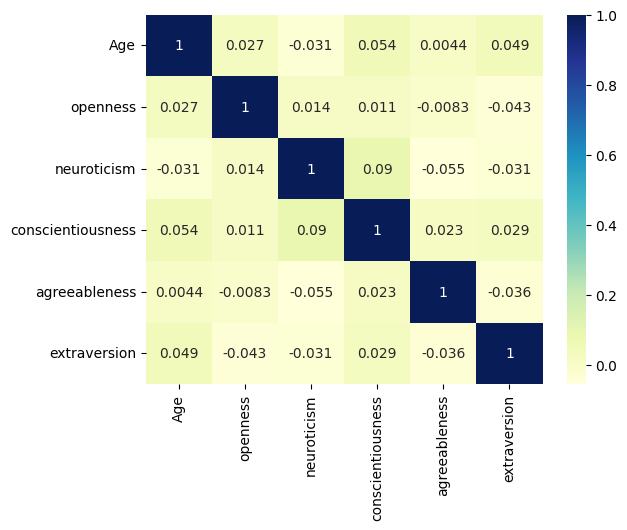

In [59]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

<ipython-input-61-89d04df67a97>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



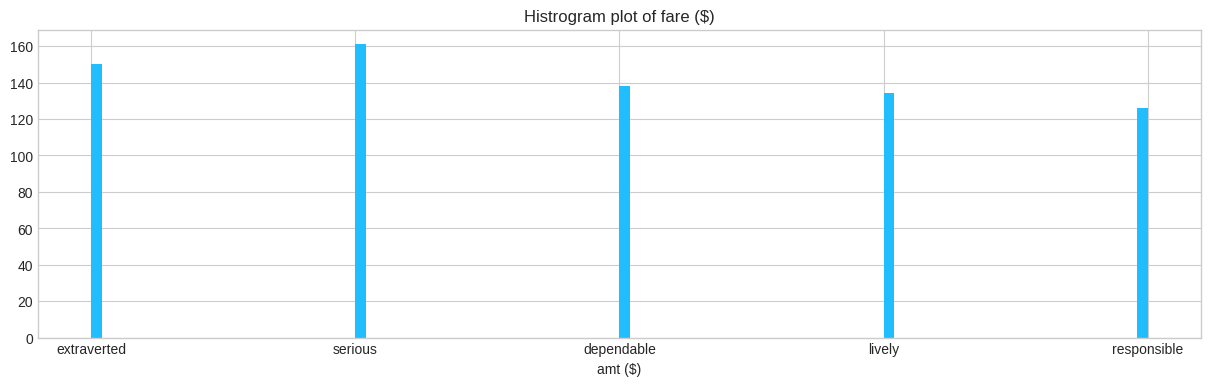

In [61]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))
plt.hist(mydata['Personality (Class label)'], bins=100, color='#20beff')
plt.xlabel("amt ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()
